In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23',)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# 2016-08-23

# Perform a query to retrieve the data and precipitation scores
one_yr_prcp = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date >= '2016-08-23').\
                        order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(one_yr_prcp, columns=['date', 'prcp'])
prcp_df.set_index(prcp_df['date'])
prcp_df.head()

# Sort the dataframe by date
# Sort DataFrame by date
prcp_df = prcp_df.sort_values(by='date')

# Set the date column as the index
prcp_df.set_index('date', inplace=True)

# Print the sorted DataFrame
print(prcp_df.head())


            prcp
date            
2016-08-23  0.00
2016-08-23  0.15
2016-08-23  0.05
2016-08-23   NaN
2016-08-23  0.02


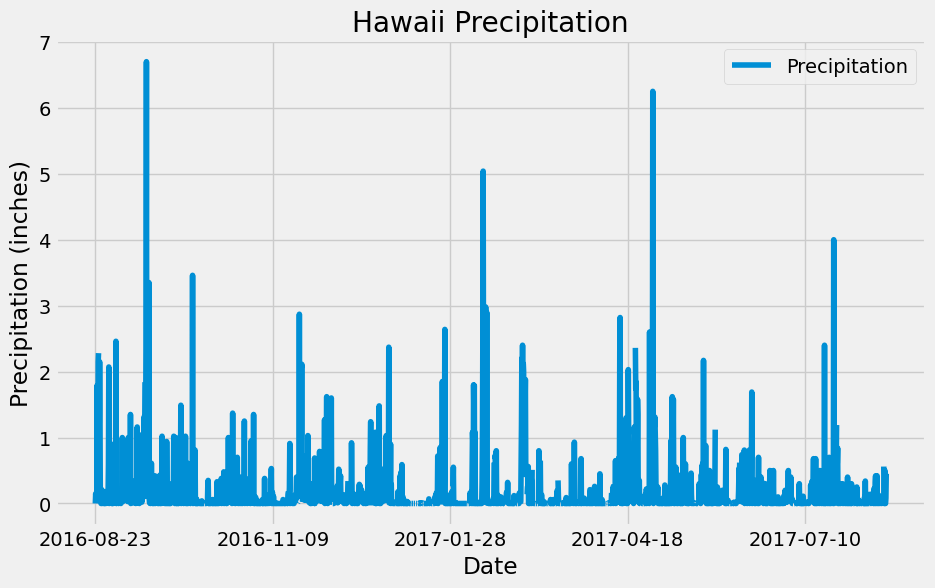

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data

# Create DataFrame
prcp_df = pd.DataFrame(one_yr_prcp, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)

# Plot data
prcp_df.plot(kind='line', y='prcp', figsize=(10,6))
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Hawaii Precipitation")
plt.legend(["Precipitation"], loc='upper right')
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.name)).all()

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

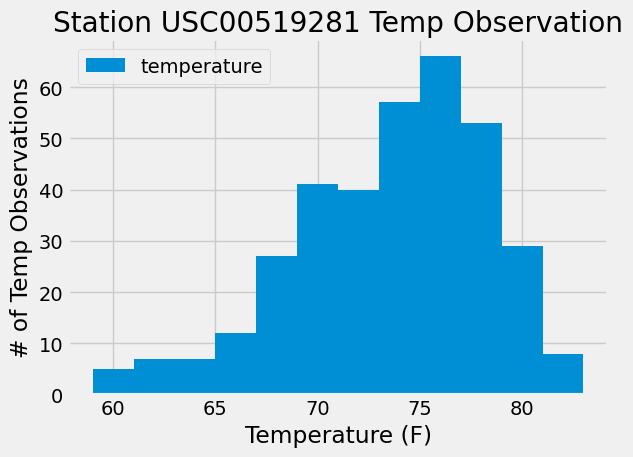

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Query the last 12 months of temperature observation data for the most active station
station_id = 'USC00519281'
temp_obs_data = session.query(Measurement.tobs).filter(Measurement.station == station_id)\
                    .filter(Measurement.date >= '2016-08-23').all()

# Create a DataFrame from the temperature observation data
temp_obs_df = pd.DataFrame(temp_obs_data, columns=['temperature'])

# Plot data as a histogram
temp_obs_df.plot.hist(bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("# of Temp Observations")
plt.title(f"Station {station_id} Temp Observation")
plt.tight_layout()
plt.show()

# Close Session

In [23]:
# Close Session
session.close()